# Test 6: Azimuthal Angle
Test the transformation of azimuthal angle by using `pyjet` examples.

## 1. Import Packages

In [1]:
# The Python Standard Library
import os
import sys
import time
import datetime
import glob
import multiprocessing as mp

# The Third-Party Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import prettytable
import uproot
import pyjet
import importlib

# My Packages
import myhep.particle_information_v2 as mypInfo_v2
import myhep.analytical_function_v2 as myaFun_v2
import myhep.analysis_v3 as myAnal_v3
# import myhep.particleinfo_v1 as mypiv1
# import myhep.particlefun_v1 as myafv1

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Azimuthal Angle $\phi$
#### Basic background:
For angle,
\begin{align}
    rad = deg\times\frac{\pi}{180},\quad deg = rad\times\frac{180}{\pi}
\end{align}
In python, the trigonometric function eats `number`, such as $\pi = 3.1415926 \rightarrow$ number.  
Therefore, the azimuthal angle $\phi$ with $rad$ unit is given by
\begin{align}
    \phi = \frac{\mathrm{number}}{\texttt{np.pi}}\times\pi
\end{align}
The important things are domain of $x$ for real result and $y$ range of usual principal value (radians and degrees)
\begin{align}
    y &= \arcsin{x},\quad -1\le x \le 1,\qquad\quad -\frac{\pi}{2}\le y \le\frac{\pi}{2} \\
    y &= \arccos{x},\quad -1\le x \le 1,\qquad\quad 0\le y \le\pi \\
    y &= \arctan{x},\quad \mathrm{all\ real\ numbers},\quad -\frac{\pi}{2}< y <\frac{\pi}{2}
\end{align}

### 2-1. Simple test

In [2]:
# deg = [0, 30, 45, 60, 90, 120, 150, 180]
# print(rad)
# print sin(rad), cos(rad), and tan(rad)
# print arcsin[sin(rad)], arccos[cos(rad)], arctan[tan(rad)]
rad = np.array([0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, 2*np.pi/3, 5*np.pi/6, np.pi])
sin, cos, tan = np.sin(rad), np.cos(rad), np.tan(rad)
arcsin = np.arcsin(sin)
arccos = np.arccos(cos)
arctan = np.arctan(tan)

print("rad = {}".format(rad))
print('-'*80)
print("sin = {}".format(sin))
print("cos = {}".format(cos))
print("tan = {}".format(tan))
print('-'*80)
print("arcsin = {}".format(arcsin))
print("arccos = {}".format(arccos))
print("arctan = {}".format(arctan))

rad = [0.         0.52359878 0.78539816 1.04719755 1.57079633 2.0943951
 2.61799388 3.14159265]
--------------------------------------------------------------------------------
sin = [0.00000000e+00 5.00000000e-01 7.07106781e-01 8.66025404e-01
 1.00000000e+00 8.66025404e-01 5.00000000e-01 1.22464680e-16]
cos = [ 1.00000000e+00  8.66025404e-01  7.07106781e-01  5.00000000e-01
  6.12323400e-17 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00]
tan = [ 0.00000000e+00  5.77350269e-01  1.00000000e+00  1.73205081e+00
  1.63312394e+16 -1.73205081e+00 -5.77350269e-01 -1.22464680e-16]
--------------------------------------------------------------------------------
arcsin = [0.00000000e+00 5.23598776e-01 7.85398163e-01 1.04719755e+00
 1.57079633e+00 1.04719755e+00 5.23598776e-01 1.22464680e-16]
arccos = [0.         0.52359878 0.78539816 1.04719755 1.57079633 2.0943951
 2.61799388 3.14159265]
arctan = [ 0.00000000e+00  5.23598776e-01  7.85398163e-01  1.04719755e+00
  1.57079633e+00 -1.04719755e+00 -

In [3]:
# print arcxxx() rad unit
# print arcxxx() deg unit
rad_arcsin, rad_arccos, rad_arctan = arcsin/np.pi, arccos/np.pi, arctan/np.pi
deg_arcsin, deg_arccos, deg_arctan = arcsin * 180/np.pi, arccos * 180/np.pi, arctan * 180/np.pi

print("sin rad = {} pi".format(np.round(rad_arcsin, 3)))
print("cos rad = {} pi".format(np.round(rad_arccos, 3)))
print("tan rad = {} pi".format(np.round(rad_arctan, 3)))
print('-'*80)
print("sin deg = {}".format(np.round(deg_arcsin, 6)))
print("cos deg = {}".format(np.round(deg_arccos, 6)))
print("tan deg = {}".format(np.round(deg_arctan, 6)))

sin rad = [0.    0.167 0.25  0.333 0.5   0.333 0.167 0.   ] pi
cos rad = [0.    0.167 0.25  0.333 0.5   0.667 0.833 1.   ] pi
tan rad = [ 0.     0.167  0.25   0.333  0.5   -0.333 -0.167 -0.   ] pi
--------------------------------------------------------------------------------
sin deg = [ 0. 30. 45. 60. 90. 60. 30.  0.]
cos deg = [  0.  30.  45.  60.  90. 120. 150. 180.]
tan deg = [  0.  30.  45.  60.  90. -60. -30.  -0.]


In [4]:
# def = [0, 30, 45, 60, 90, 120, 150, 180]
np.round(np.array([0, 1/6, 1/4, 1/3, 1/2, 2/3, 5/6, 1]), 3)

array([0.   , 0.167, 0.25 , 0.333, 0.5  , 0.667, 0.833, 1.   ])

##### Conclusion: Because $\sin$ and $\tan$ are positive and negative in quadrant `II`, respectively.

### 2-2. Test `numpy.arctan` and `numpy.arctan2`

In [5]:
# A. arctan
np.arctan([0, 1])

array([0.        , 0.78539816])

In [6]:
np.pi/4

0.7853981633974483

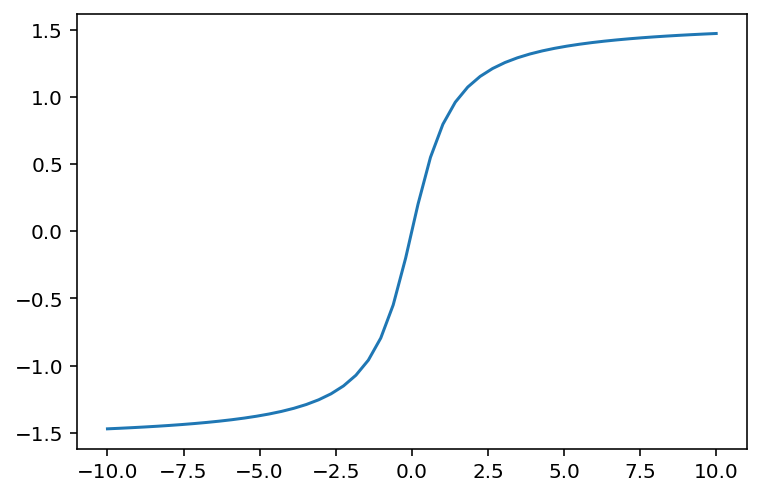

In [7]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10)
plt.plot(x, np.arctan(x))
plt.axis('tight')
plt.show()

In [8]:
# B. arctan2
# -1/-1 = -135 III, -1/+1 = -45 IV, +1/+1 = 45 I, +1/-1 = 135 II
x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])
np.arctan2(y, x) * 180 / np.pi

array([-135.,  -45.,   45.,  135.])

In [9]:
np.arctan2(y, x)

array([-2.35619449, -0.78539816,  0.78539816,  2.35619449])

In [10]:
# 1/0 = 90 I II, -1/0 = -90 III IV
np.arctan2([1., -1.], [0., 0.])

array([ 1.57079633, -1.57079633])

In [11]:
np.arctan2([1., -1.], [0., 0.]) * 180 / np.pi

array([ 90., -90.])

In [12]:
# 0/+0 = 0 deg, 0/-0 = 180 deg, np.inf/np.inf = 45 I
ex = np.arctan2([0., 0., np.inf], [+0., -0., np.inf])
ex

array([0.        , 3.14159265, 0.78539816])

In [13]:
ex * 180 / np.pi

array([  0., 180.,  45.])

##### Conclusion: `arctan2` is powerful function what I want.

In [14]:
x = np.array([+0., +0., -0., -0.])
y = np.array([+0., -0., +0., -0.])
np.arctan2(y, x) * 180 / np.pi

array([   0.,   -0.,  180., -180.])

In [15]:
x = np.array([+np.inf, -np.inf, +np.inf, -np.inf])
y = np.array([1, 1, -1, -1])
np.arctan2(y, x) * 180 / np.pi

array([   0.,  180.,   -0., -180.])

In [16]:
x = np.array([+np.inf, +np.inf, -np.inf, -np.inf])
y = np.array([+np.inf, -np.inf, +np.inf, -np.inf])
np.arctan2(y, x) * 180 / np.pi

array([  45.,  -45.,  135., -135.])

## 3. Import `pyjet` example

In [17]:
from pyjet import cluster
from pyjet.testdata import get_event
from numpy.lib.recfunctions import append_fields
from numpy.testing import assert_array_equal
import numpy as np

event = get_event()
# event = append_fields(event, 'id', data=np.arange(len(event)))
sequence = cluster(event, R=0.6, p=-1)
jets = sequence.inclusive_jets()

### 3-1. Basic

In [18]:
print(event.shape)
event[:5]

(354,)


array([(1.51535651, -5.33650888, -2.19101187, 0.49360001),
       (0.23821122, -4.40409474,  1.59250675, 0.13957   ),
       (0.27189954, -3.93089818,  1.43715817, 0.13957   ),
       (0.26339374, -1.68243005, -2.56397904, 0.13957   ),
       (1.64420492, -2.0335164 ,  0.68656051, 0.13957   )],
      dtype=[('pT', '<f8'), ('eta', '<f8'), ('phi', '<f8'), ('mass', '<f8')])

In [19]:
event['pT'][:5]

array([1.51535651, 0.23821122, 0.27189954, 0.26339374, 1.64420492])

In [20]:
sequence

In [21]:
jets[:6]

[PseudoJet(pt=983.280, eta=-0.868, phi=2.905, mass=36.457),
 PseudoJet(pt=901.745, eta=0.221, phi=-0.252, mass=51.850),
 PseudoJet(pt=67.994, eta=-1.194, phi=-0.200, mass=11.984),
 PseudoJet(pt=12.465, eta=0.433, phi=0.673, mass=5.461),
 PseudoJet(pt=6.568, eta=-2.629, phi=1.133, mass=2.099),
 PseudoJet(pt=6.498, eta=-1.828, phi=-2.248, mass=3.309)]

In [22]:
# Printing a few things here as a demonstration of the basic functionality
print("{0: <5} {1: >10} {2: >10} {3: >10} {4: >10} {5: >10}".format(
    "jet#", "pT", "eta", "phi", "mass", "#constit."))
for i, jet in enumerate(jets[:6]):
    print("{0: <5} {1: 10.3f} {2: 10.3f} {3: 10.3f} {4: 10.3f} {5: 10}".format(
        i + 1, jet.pt, jet.eta, jet.phi, jet.mass, len(jet)))

jet#          pT        eta        phi       mass  #constit.
1        983.280     -0.868      2.905     36.457         34
2        901.745      0.221     -0.252     51.850         34
3         67.994     -1.194     -0.200     11.984         32
4         12.465      0.433      0.673      5.461         13
5          6.568     -2.629      1.133      2.099          9
6          6.498     -1.828     -2.248      3.309          6


In [23]:
print("\nThe 6th jet has the following constituents:")
for constit in jets[5]:
    print(constit)
print("\nGet the constituents as an array (pT, eta, phi, mass):")
print(jets[5].constituents_array())
print("\nor (E, px, py, pz):")
print(jets[5].constituents_array(ep=True))


The 6th jet has the following constituents:
PseudoJet(pt=0.096, eta=-2.166, phi=-2.271, mass=0.000)
PseudoJet(pt=2.200, eta=-1.747, phi=-1.972, mass=0.140)
PseudoJet(pt=1.713, eta=-2.037, phi=-2.469, mass=0.940)
PseudoJet(pt=0.263, eta=-1.682, phi=-2.564, mass=0.140)
PseudoJet(pt=1.478, eta=-1.738, phi=-2.343, mass=0.940)
PseudoJet(pt=0.894, eta=-1.527, phi=-2.250, mass=0.140)

Get the constituents as an array (pT, eta, phi, mass):
[(0.09551261, -2.16560157, -2.27109083, 4.8909123e-06)
 (2.19975694, -1.74672746, -1.97178728, 1.3957000e-01)
 (1.71301882, -2.03656511, -2.46861524, 9.3957000e-01)
 (0.26339374, -1.68243005, -2.56397904, 1.3957000e-01)
 (1.47781519, -1.7378898 , -2.34304346, 9.3957000e-01)
 (0.89353864, -1.52729244, -2.24973202, 1.3957000e-01)]

or (E, px, py, pz):
[(0.42190436, -0.06155242, -0.07303395, -0.41095089)
 (6.50193926, -0.85863306, -2.02526044, -6.11692764)
 (6.74203628, -1.33952806, -1.06775374, -6.45273802)
 (0.74600384, -0.22066287, -0.1438199 , -0.68386087)

### 3-2. Check the transformation of $(p_T, \eta, \phi, m) \leftrightarrow (E, p_x, p_y, p_z)$
We use 6th jet with 6 constituents, the transformation is given by
\begin{align}
    p^\mu = (E,\ p_x,\ p_y,\ p_z) = (m_T\cosh{\eta},\ p_T\cos{\phi},\ p_T\sin{\phi},\ m_T\sinh{\eta})
\end{align}
where $m_T$, conventionally called the `transverse mass`, is defined by
\begin{align}
    m_T^2 = m^2 + p_x^2 + p_y^2 = E^2 - p_z^2 = E_T
\end{align}

In [24]:
constit_pt = jets[5].constituents_array()
constit_ep = jets[5].constituents_array(ep=True)
constit_pt

array([(0.09551261, -2.16560157, -2.27109083, 4.8909123e-06),
       (2.19975694, -1.74672746, -1.97178728, 1.3957000e-01),
       (1.71301882, -2.03656511, -2.46861524, 9.3957000e-01),
       (0.26339374, -1.68243005, -2.56397904, 1.3957000e-01),
       (1.47781519, -1.7378898 , -2.34304346, 9.3957000e-01),
       (0.89353864, -1.52729244, -2.24973202, 1.3957000e-01)],
      dtype=[('pT', '<f8'), ('eta', '<f8'), ('phi', '<f8'), ('mass', '<f8')])

In [25]:
constit_ep

array([(0.42190436, -0.06155242, -0.07303395, -0.41095089),
       (6.50193926, -0.85863306, -2.02526044, -6.11692764),
       (6.74203628, -1.33952806, -1.06775374, -6.45273802),
       (0.74600384, -0.22066287, -0.1438199 , -0.68386087),
       (4.43164941, -1.0311407 , -1.05862485, -4.07096881),
       (2.15920027, -0.56111108, -0.69538886, -1.96067711)],
      dtype=[('E', '<f8'), ('px', '<f8'), ('py', '<f8'), ('pz', '<f8')])

In [26]:
# (pT, eta, phi, mass) -> (E, px, py, pz)
# pyjet answer
pt, eta = constit_pt['pT'], constit_pt['eta']
phi, mass = constit_pt['phi'], constit_pt['mass']
e, px = constit_ep['E'], constit_ep['px']
py, pz = constit_ep['py'], constit_ep['pz']

# my answer of (E, px, py, pz)
# transf_px = constit_pt['pT'] * np.cos(constit_pt['phi']) # trouble way
transf_px = pt * np.cos(phi)
transf_py = pt * np.sin(phi)
transf_pz = np.sqrt(mass**2 + pt**2) * np.sinh(eta) # not good! my way, but not consistent with pyjet
transf_pz2 = pt * np.sinh(eta) # pyjet
transf_e = np.sqrt(mass**2 + transf_px**2 + transf_py**2 + transf_pz**2) # better
transf_e2 = pt * np.cosh(eta) # not good!

print("E:   {}".format(np.sum(transf_e - e)))
print("E2:  {}     not good!".format(np.sum(transf_e2 - e)))
print("px:  {}".format(np.sum(transf_px - px)))
print("py:  {}".format(np.sum(transf_py - py)))
print("pz:  {}     not good!".format(np.sum(transf_pz - pz)))
print("pz2: {}".format(np.sum(transf_pz2 - pz)))
print('-'*80)

# my answer of (pT, eta, phi, mass)
ptot = np.sqrt(px**2 + py**2 + pz**2)
costheta = pz/ptot
theta = np.arccos(pz/ptot)
transf_pt = np.sqrt(px**2 + py**2)
transf_eta = -np.log(np.tan(theta/2)) # not bad
transf_eta2 = -0.5 * np.log(np.divide(1. - costheta, 1. + costheta)) # copy from pyjet
transf_phi = np.arctan2(py, px) # brilliant!!
transf_m = np.sqrt(e**2 - px**2 - py**2 - pz**2)

print("pT:   {}".format(np.sum(transf_pt - pt)))
print("eta:  {}".format(np.sum(transf_eta - eta)))
print("eta2: {}".format(np.sum(transf_eta2 - eta)))
print("phi:  {}  np.arctan2() is brilliant!!".format(np.sum(transf_phi - phi)))
print("mass: {}".format(np.sum(transf_m - mass)))

E:   1.6895120335755407
E2:  -0.1857223360250091     not good!
px:  7.771561172376096e-16
py:  -4.440892098500626e-16
pz:  -1.7861605293542375     not good!
pz2: 1.6431300764452317e-14
--------------------------------------------------------------------------------
pT:   0.0
eta:  -3.3306690738754696e-15
eta2: -2.4424906541753444e-15
phi:  -4.440892098500626e-16  np.arctan2() is brilliant!!
mass: 8.799073174589741e-13


##### Conclusion: I think the results of transformations are very good!!

In [27]:
# examples of px and phi
print(transf_px)
print(px)
print(transf_px - px)
print('-'*80)
print(transf_phi)
print(phi)
print(transf_phi - phi)

[-0.06155242 -0.85863306 -1.33952806 -0.22066287 -1.0311407  -0.56111108]
[-0.06155242 -0.85863306 -1.33952806 -0.22066287 -1.0311407  -0.56111108]
[0.00000000e+00 7.77156117e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
--------------------------------------------------------------------------------
[-2.27109083 -1.97178728 -2.46861524 -2.56397904 -2.34304346 -2.24973202]
[-2.27109083 -1.97178728 -2.46861524 -2.56397904 -2.34304346 -2.24973202]
[ 0.0000000e+00 -4.4408921e-16  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


In [28]:
# print all differences
# (E, px, py, pz)
print("E:   {}".format(transf_e - e))
print("px:  {}".format(transf_px - px))
print("py:  {}".format(transf_py - py))
print("pz:  {}".format(transf_pz - pz))
print("pz2: {}".format(transf_pz2 - pz))
print('-'*80)
# (pT, eta, phi, mass)
print("pT:   {}".format(transf_pt - pt))
print("eta:  {}".format(transf_eta - eta))
print("eta2:  {}".format(transf_eta2 - eta))
print("phi:  {}".format(transf_phi - phi))
print("mass: {}".format(transf_m - mass))

E:   [5.24800370e-10 1.15729004e-02 8.72511128e-01 8.33543701e-02
 7.00462442e-01 2.16111923e-02]
px:  [0.00000000e+00 7.77156117e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
py:  [ 0.0000000e+00 -4.4408921e-16  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
pz:  [-5.38788403e-10 -1.22999032e-02 -9.06888804e-01 -9.00764673e-02
 -7.53121014e-01 -2.37743402e-02]
pz2: [ 0.00000000e+00  7.10542736e-15  9.76996262e-15  0.00000000e+00
 -8.88178420e-16  4.44089210e-16]
--------------------------------------------------------------------------------
pT:   [0. 0. 0. 0. 0. 0.]
eta:  [ 0.00000000e+00 -1.55431223e-15 -1.77635684e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
eta2:  [ 0.00000000e+00 -1.11022302e-15 -1.33226763e-15  0.00000000e+00
  2.22044605e-16 -2.22044605e-16]
phi:  [ 0.0000000e+00 -4.4408921e-16  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
mass: [ 8.86707433e-13 -3.16413562e-15 -2.77555756e-15 -5.55111512e-17
  0.000000

##### Conclusion: Actually, $p_x$, $p_y$, $p_T$. $\eta$, $\phi$ are reconstructed well.

### 3-3. Construct `PseudoJet` from constituents of `pyjet`
We use 6 constituents $(E, p_x, p_y, p_z)$ of 6th jet as example!

#### `!!! Use this transformation !!!`

In [29]:
# construct (pT, eta, phi, mass) of 6th PseudoJet
# constituents from pyjet
constit_ep = jets[5].constituents_array(ep=True)
e, px = constit_ep['E'], constit_ep['px']
py, pz = constit_ep['py'], constit_ep['pz']

# calculate 4-vector of jet
etot, pxtot = np.sum(e), np.sum(px)
pytot, pztot = np.sum(py), np.sum(pz)
ptot = np.sqrt(pxtot**2 + pytot**2 + pztot**2)
theta = np.arccos(pztot/ptot)

# transform to (pT, eta, phi, mass)
pt = np.sqrt(pxtot**2 + pytot**2)
eta = -np.log(np.tan(theta/2))
phi = np.arctan2(pytot, pxtot)
mass = np.sqrt(etot**2 - pxtot**2 - pytot**2 - pztot**2)

print("My answer:    {}".format([pt, eta, phi, mass]))
print("pyjet answer: {}".format(jets[5]))
print("Check:")
print("pT:   {}".format(pt - jets[5].pt))
print("eta:  {}".format(eta - jets[5].eta))
print("phi:  {}".format(phi - jets[5].phi))
print("mass: {}, jets.mass = {}".format(mass - jets[5].mass, jets[5].mass))


My answer:    [6.498399702250736, -1.8281788317457772, -2.248123520011987, 3.3088273980541687]
pyjet answer: PseudoJet(pt=6.498, eta=-1.828, phi=-2.248, mass=3.309)
Check:
pT:   0.0
eta:  0.0
phi:  0.0
mass: -5.329070518200751e-15, jets.mass = 3.308827398054174


##### Conclusion: `PseudoJet` is net 4-vector of all constituents and the reconstruction is very well, but the mass has some uncertainty.

#### `!!! Use this transformation !!!`

### 3-4. Use the transformation of `pyjet`
[- pyjet/utils.py](https://github.com/scikit-hep/pyjet/blob/master/pyjet/utils.py)

In [40]:
DTYPE_EP = [('E', '<f8'), ('px', '<f8'), ('py', '<f8'), ('pz', '<f8')]
DTYPE_PTEPM = [('pT', '<f8'), ('eta', '<f8'), ('phi', '<f8'), ('mass', '<f8')]

def ptepm2ep(rec):
    """ Convert (pT, eta, phi, mass) into (E, px, py, pz)
    Note that the field names of the input array need not match "pT", "eta",
    "phi", or "mass". This function only assumes that the first four fields
    are those quantities. Garbage in, garbage out.
    """
    pt, eta, phi, mass = rec.dtype.names[:4]
    vects = np.empty(rec.shape[0], dtype=DTYPE_EP)
    vects['px'] = rec[pt] * np.cos(rec[phi])
    vects['py'] = rec[pt] * np.sin(rec[phi])
    vects['pz'] = rec[pt] * np.sinh(rec[eta])
    vects['E'] = np.sqrt(vects['px']**2 + vects['py']**2 + vects['pz']**2 + rec[mass]**2)
    return vects


def ep2ptepm(rec):
    """ Convert (E, px, py, pz) into (pT, eta, phi, mass)
    Note that the field names of the input array need not match "E", "px",
    "py", or "pz". This function only assumes that the first four fields
    are those quantities. Garbage in, garbage out.
    """
    E, px, py, pz = rec.dtype.names[:4]
    vects = np.empty(rec.shape[0], dtype=DTYPE_PTEPM)
    ptot = np.sqrt(np.power(rec[px], 2) + np.power(rec[py], 2) + np.power(rec[pz], 2))
    costheta = np.divide(rec[pz], ptot)
    costheta[ptot == 0] = 1.
    good_costheta = np.power(costheta, 2) < 1
    vects['pT'] = np.sqrt(np.power(rec[px], 2) + np.power(rec[py], 2))
    vects['eta'][good_costheta] = -0.5 * np.log(np.divide(1. - costheta, 1. + costheta))
    vects['eta'][~good_costheta & (rec[pz] == 0.)] = 0.
    vects['eta'][~good_costheta & (rec[pz] > 0.)] = 10e10
    vects['eta'][~good_costheta & (rec[pz] < 0.)] = -10e10
    vects['phi'] = np.arctan2(rec[py], rec[px])
    vects['phi'][(rec[py] == 0) & (rec[px] == 0)] = 0
    mass2 = np.power(rec[E], 2) - np.power(ptot, 2)
    neg_mass2 = mass2 < 0
    mass2[neg_mass2] *= -1
    vects['mass'] = np.sqrt(mass2)
    vects['mass'][neg_mass2] *= -1
    return vects

In [45]:
pyjet_ep = ptepm2ep(constit_pt)
pyjet_ptepm = ep2ptepm(constit_ep)
pyjet_ep

array([(0.42190436, -0.06155242, -0.07303395, -0.41095089),
       (6.50193926, -0.85863306, -2.02526044, -6.11692764),
       (6.74203628, -1.33952806, -1.06775374, -6.45273802),
       (0.74600384, -0.22066287, -0.1438199 , -0.68386087),
       (4.43164941, -1.0311407 , -1.05862485, -4.07096881),
       (2.15920027, -0.56111108, -0.69538886, -1.96067711)],
      dtype=[('E', '<f8'), ('px', '<f8'), ('py', '<f8'), ('pz', '<f8')])

In [54]:
# check (pT, eta, phi, mass) -> (E, px, py, pz)
for i in pyjet_ep.dtype.names:
    diff_ep = pyjet_ep[i] - constit_ep[i]
    sum_ep = np.sum(diff_ep)
    print(i, ": {}".format(sum_ep))
    print(diff_ep)
    print('-'*80)

E : -1.554312234475219e-14
[ 0.00000000e+00 -7.10542736e-15 -8.88178420e-15  0.00000000e+00
  8.88178420e-16 -4.44089210e-16]
--------------------------------------------------------------------------------
px : 7.771561172376096e-16
[0.00000000e+00 7.77156117e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
--------------------------------------------------------------------------------
py : -4.440892098500626e-16
[ 0.0000000e+00 -4.4408921e-16  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
--------------------------------------------------------------------------------
pz : 1.6431300764452317e-14
[ 0.00000000e+00  7.10542736e-15  9.76996262e-15  0.00000000e+00
 -8.88178420e-16  4.44089210e-16]
--------------------------------------------------------------------------------


In [55]:
# check (E, px, py, pz) -> (pT, eta, phi, mass)
for i in pyjet_ptepm.dtype.names:
    diff_pt = pyjet_ptepm[i] - constit_pt[i]
    sum_pt = np.sum(diff_pt)
    print(i, ": {}".format(sum_pt))
    print(diff_pt)
    print('-'*80)

pT : 0.0
[0. 0. 0. 0. 0. 0.]
--------------------------------------------------------------------------------
eta : -2.4424906541753444e-15
[ 0.00000000e+00 -1.11022302e-15 -1.33226763e-15  0.00000000e+00
  2.22044605e-16 -2.22044605e-16]
--------------------------------------------------------------------------------
phi : -4.440892098500626e-16
[ 0.0000000e+00 -4.4408921e-16  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
--------------------------------------------------------------------------------
mass : 8.603118810743401e-13
[ 8.86707433e-13 -2.86159985e-14  4.77395901e-15  1.38777878e-16
 -1.88737914e-15 -8.04911693e-16]
--------------------------------------------------------------------------------


##### Conclusion: The results are similar to my results, it cannot have the same values.

## Cool Method!!

In [56]:
pt, eta, phi, mass = event.dtype.names[:4]
event[pt][:5]

array([1.51535651, 0.23821122, 0.27189954, 0.26339374, 1.64420492])